<a href="https://colab.research.google.com/github/RJ-git8585/OIBSIP/blob/main/Sales_Predictons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data** 



In [123]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [124]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# **Droping Unnessesory Column**

In [125]:
df=df.drop(['Unnamed: 0'],axis=1)

In [126]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# **Checking missing value**

In [127]:
df.isna().mean()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

# **Checking Linearity**

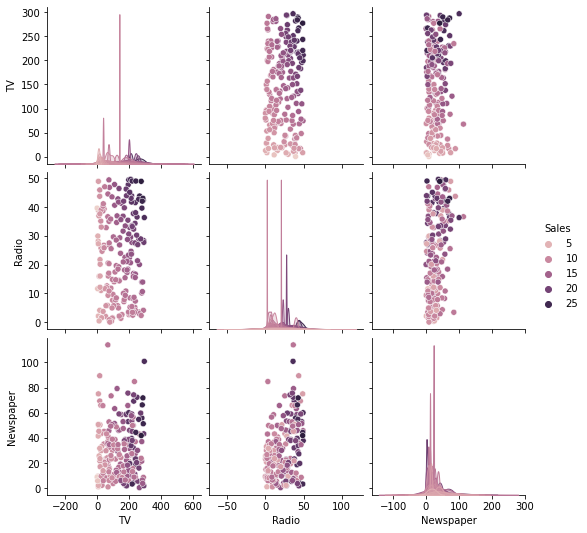

In [128]:
import seaborn as sns
sns.pairplot(df,hue='Sales')

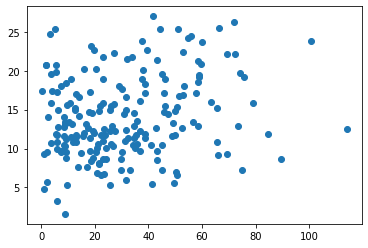

In [129]:
import matplotlib.pyplot as plt
plt.scatter(df['Newspaper'],df['Sales'])

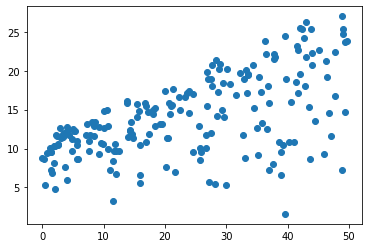

In [130]:
plt.scatter(df['Radio'],df['Sales'])

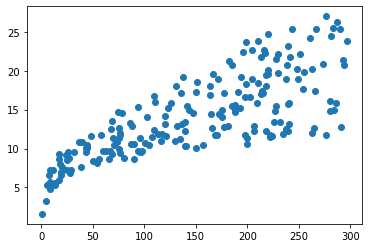

In [131]:
plt.scatter(df['TV'],df['Sales'])

# **Assigning Input and target value**







In [132]:
x=df.iloc[:,0:3]

y=df.iloc[:,3]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [133]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
st=StandardScaler()
x=st.fit_transform(x)


# **Splitting data into training and testing data**

In [134]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)


# **Applying Linear Regression**

In [135]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)


# **Calculating Accuracy of Model**

In [136]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(ytest,y_pred))

r2_score is 0.7558194773721316


# **Apply Random Forest Regressor**

In [137]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

# **Calculating Accuracy of Model**

In [138]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(ytest,ypred))

r2_score is 0.9642632642804371
